In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/Users/adityatiwari/Desktop/Python/CarWarehouse/Version_3/excel_data/car_data.csv')

In [4]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
data.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

In [6]:
car_list = data[['make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location','horsepower','city-mpg','highway-mpg','price']]

In [7]:
pd.set_option('display.max_columns',26)
pd.set_option('display.max_rows',100)

In [8]:
car_list

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,106,26,27,22470


In [9]:
import sqlite3
conn = sqlite3.connect('/Users/adityatiwari/Desktop/Python/CarWarehouse/Version_3/Database/cars.db')
print("\nDatabase accessed!\n")

c = conn.cursor()

car_list.to_sql('Cars', conn, if_exists='replace', index=False)
conn.commit()
conn.close()


Database accessed!



In [10]:
import sqlite3
conn = sqlite3.connect('/Users/adityatiwari/Desktop/Python/CarWarehouse/Version_3/Database/cars.db')
print("\nDatabase accessed!\n")

sql_query = pd.read_sql_query(''' Select * from  Cars''',conn)

df = pd.DataFrame(sql_query, columns=['make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location','horsepower','city-mpg','highway-mpg','price'])
print(df)


Database accessed!

            make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std          two  convertible          rwd   
1    alfa-romero       gas        std          two  convertible          rwd   
2    alfa-romero       gas        std          two    hatchback          rwd   
3           audi       gas        std         four        sedan          fwd   
4           audi       gas        std         four        sedan          4wd   
..           ...       ...        ...          ...          ...          ...   
200        volvo       gas        std         four        sedan          rwd   
201        volvo       gas      turbo         four        sedan          rwd   
202        volvo       gas        std         four        sedan          rwd   
203        volvo    diesel      turbo         four        sedan          rwd   
204        volvo       gas      turbo         four        sedan          rwd   

    engine-locatio

In [10]:
pwd

'/Users/adityatiwari/Desktop/Python/CarWarehouse/Version_3'

In [30]:
car_cnt = df['make'].value_counts().to_dict()

In [32]:
car_cnt[]

{'toyota': 32,
 'nissan': 18,
 'mazda': 17,
 'mitsubishi': 13,
 'honda': 13,
 'subaru': 12,
 'volkswagen': 12,
 'peugot': 11,
 'volvo': 11,
 'dodge': 9,
 'bmw': 8,
 'mercedes-benz': 8,
 'plymouth': 7,
 'audi': 7,
 'saab': 6,
 'porsche': 5,
 'isuzu': 4,
 'alfa-romero': 3,
 'chevrolet': 3,
 'jaguar': 3,
 'renault': 2,
 'mercury': 1}

In [41]:
for key,value in car_cnt.items():
    print(key)
    print(value)

toyota
32
nissan
18
mazda
17
mitsubishi
13
honda
13
subaru
12
volkswagen
12
peugot
11
volvo
11
dodge
9
bmw
8
mercedes-benz
8
plymouth
7
audi
7
saab
6
porsche
5
isuzu
4
alfa-romero
3
chevrolet
3
jaguar
3
renault
2
mercury
1


In [42]:
car_manf = []
no_cars = []
for key, value in car_cnt.items():
    car_manf.append(key)
    no_cars.append(value)

In [43]:
car_manf

['toyota',
 'nissan',
 'mazda',
 'mitsubishi',
 'honda',
 'subaru',
 'volkswagen',
 'peugot',
 'volvo',
 'dodge',
 'bmw',
 'mercedes-benz',
 'plymouth',
 'audi',
 'saab',
 'porsche',
 'isuzu',
 'alfa-romero',
 'chevrolet',
 'jaguar',
 'renault',
 'mercury']

In [44]:
no_cars

[32, 18, 17, 13, 13, 12, 12, 11, 11, 9, 8, 8, 7, 7, 6, 5, 4, 3, 3, 3, 2, 1]

Text(0, 0.5, 'No. of Cars')

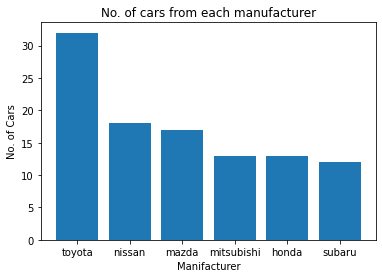

In [51]:
from matplotlib import pyplot as plt
plt.bar(car_manf[:6],no_cars[:6])
plt.title('No. of cars from each manufacturer')
plt.xlabel('Manifacturer')
plt.ylabel('No. of Cars')